# Universidade Federal do Rio Grande do Sul (UFRGS)
# Programa de Pós-Graduação em Engenharia Civil (PPGEC) 
## PEC00025: Introdução à vibrações
### Aluno: Yuri Claudio Vieira da Costa - 305306
#### RESPOSTA DE UM SISTEMA COM 1 GRAU DE LIBERDADE A UMA EXCITAÇÃO NA BASE: ESPECTRO DE PSEUDO ACELERAÇÃO.

## Sumário

[1.   INTRODUÇÃO](#section_1) 

[1.1.  Metodologia](#section_11)

[2.   COLETA DAS ACELERAÇÕES DO SISTEMA](#section_2)

[3.   CARACTERÍSTICAS DA ESTRUTURA ANALISADA](#section_3)

[4.   INTEGRAÇÃO DE DUHAMEL'S E GRÁFICO DO PSEUDO ESPECTRO](#section_4)

[5.   PERIODOGRAMA](#section_5)

[6.   RESULTADOS E DISCUSSÃO](#section_6)

[     REFERÊNCIAS](#section_7)

## 1. INTRODUÇÃO <a name="section_1"></a>

Este trabalho analisa a resposta de um sistema idealizado com 1 grau de liberdade devido a uma excitação dinâmica. O objetivo é obter o gráfico do pseudo espectro da aceleração, assim como o periodograma da aceleração e do deslocamento.

### 1.1. Metodologia <a name="section_11"></a>

Utilizando o acelerômetro disponível no aplicativo [iNVH](https://appcenter.bosch.com/details/-/app/iNVH) da empresa Bosch, foram coletadas as acelerações de uma bancada devido a carga de três impulsos. A estrutura é analisada com 1 grau de liberdade (eixo z - direção da gravidade) e as resposta são analisadas por meio da linguagem de programação Python utilizando as bibliotecas Numpy, Pandas e Matplotlib. Assim como o [MRPy](https://github.com/mmaiarocha/MRPy) e os algorítmos implementados pelo professor [Marcelo Rocha](https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_05_NumericalIntegration.ipynb?flushcache=true).
Por meio da técnica de integração de Duhamel's as respostas são obtidas em função dos deslocamentos do sistema. Assim, para diferentes frequências são obtidos os deslocamentos máximos da bancada. Esses dados são utilizados para gerar o pseudo espectro da aceleração e os periodogramas input e output do sistema. 

## 2. COLETA DAS ACELERAÇÕES DO SISTEMA <a name="section_2"></a>

As acelerações da banca foram obtidas utilizando o aplicativo [iNVH](https://appcenter.bosch.com/details/-/app/iNVH) instalado em um smartphone da marca sony, modelo xperia XA1. Foram coletadas as acelerações da bancada devido a carga de três impulsos. Os dados foram formatados em gráficos utilizando a rotina proposta pelo professor Marcelo Rocha e são apresentados abaixo. Vale destacar que o aplicativo coleta as aceleraçãos com três graus de liberdade, gerando três gráficos. 


In [523]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MRPy import MRPy

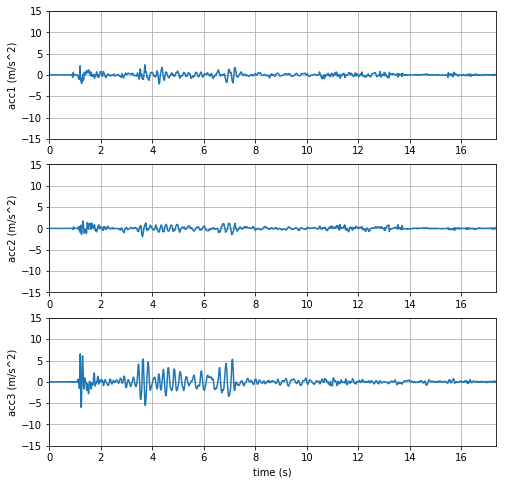

In [524]:
#Leitura do arquivo de saída do acelerômetro e plotagem dos gráficos (eixo x, y e z)
data = MRPy.from_file('data', form='invh').zero_mean()
t    = data.t_axis()


plt.figure(1, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-15, 15);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Como já mencionado, as análise são realizadas considerando 1 grau de liberdade (eixo z). Esse gráfico é apresentado isoladamente na rotina abaixo.

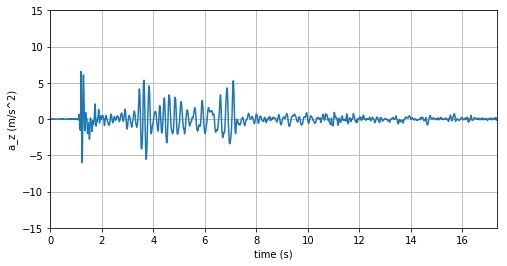

In [525]:
#Leitura do arquivo de saída do acelerômetro e plotagem do gráfico (eixo z)
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

## 3. CARACTERÍSTICAS DA ESTRUTURA ANALISADA <a name="section_3"></a>

A estrutura em análise é uma bancada, como suas propriedades são desconhecidas, foram adotados valores fictícios, conforme mostrado:

In [526]:
m  = 1.0       # system mass in kg
fn = 1.0       # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity

## 4. INTEGRAÇÃO DE DUHAMEL'S E GRÁFICO DO PSEUDO ESPECTRO <a name="section_4"></a>

Para obter os deslocamentos máximos da estrutura em análise os dados foram convertidos do domínio da aceleração para o domínio dos deslocamentos utilizando integração de Duhamel's. 

$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$
                  
                  
Para isso, foi utilizado o algoritmo abaixo com a geração do gráfico.

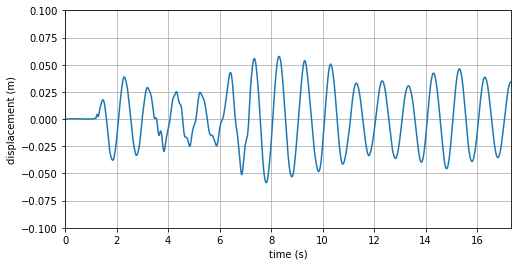

In [527]:
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(3, figsize=(8, 4), clear=True)
plt.plot(t, u_DH[0])

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.1, 0.1);   plt.ylabel('displacement (m)') 

plt.grid(True) 

Utilizando a função max(), foi coletado o deslocamento máximo. O qual é apresentado abaixo.

In [528]:
print(max(u_DH[0]), 'm')

0.05760715671739315 m


Por meio de uma rotina, foram coletados os deslocamentos máximos para várias frequências diferenres variando de 1 até 40. O objetivo é gerar o gráfico do pseudo espectro da aceleraão. 

Aceleração de pico (m/s²)   /   Período (s)
0.05760715671739315   /   1.0
0.12174825559217008   /   0.5
0.41305888142431724   /   0.3333333333333333
1.298188682697808   /   0.25
1.2932777815167054   /   0.2
0.7400825838651601   /   0.16666666666666666
0.6548256996228982   /   0.14285714285714285
0.48909492513923675   /   0.125
0.5084513296446495   /   0.1111111111111111
0.6471747705776623   /   0.1
0.7646856692683801   /   0.09090909090909091
0.6958759477386923   /   0.08333333333333333
0.7177658510803439   /   0.07692307692307693
0.6456797555219931   /   0.07142857142857142
0.6133084571219914   /   0.06666666666666667
0.5242003209060802   /   0.0625
0.47174798859900835   /   0.058823529411764705
0.36235240901975857   /   0.05555555555555555
0.34231425592903547   /   0.05263157894736842
0.28845988783460735   /   0.05
0.2867718799739902   /   0.047619047619047616
0.316073641615854   /   0.045454545454545456
0.3086828463719365   /   0.043478260869565216
0.2702708100816532   /   0.0416666

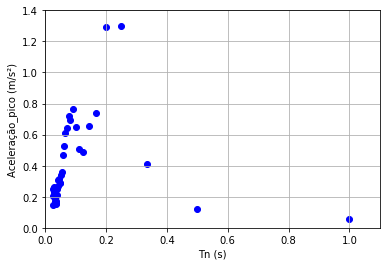

In [529]:
print('Aceleração de pico (m/s²)','  /  ', 'Período (s)')
while(fn < 40):
    az = MRPy(data[2], data.fs)
    u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m
    plt.scatter(1/fn,fn*fn*max(u_DH[0]),color='blue')
    plt.xlim(0, 1.1);    
    plt.ylim(0,  1.4); 
    plt.xlabel('Tn (s)')
    plt.ylabel('Aceleração_pico (m/s²)')
    plt.grid(True)
    print(max(u_DH[0])*fn*fn,'  /  ',(1/fn))
    fn += 1

Pela análise do gráfico e da matriz, percebemos que em 4Hz e 5Hz a estutura apresenta as maiores acelerações de pico e consequentimente os maiores deslocamentos.

## 5. PERIODOGRAMA <a name="section_5"></a>

Inicialmente foi gerado o periodograma para análise das frequências das aceleração, conforme rotina e gráfico apresentados abaixo. 

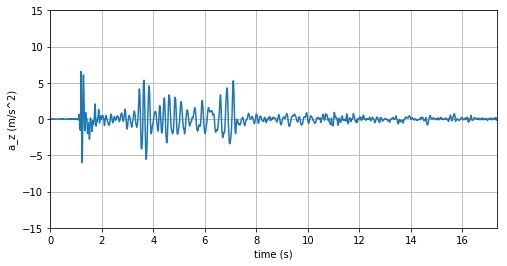

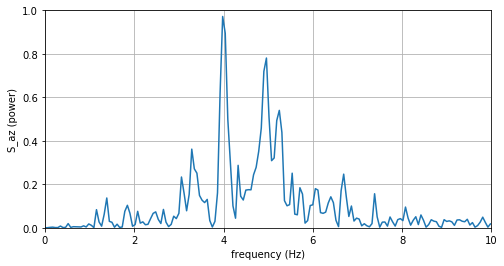

In [530]:
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-15, 15);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 10);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  1);   plt.ylabel('S_az (power)') 

plt.grid(True) 

Pelo gráfico, percebemos que a maior energia está na freuência de 4 Hz. Essa frequência é utilizada para gerar o periodograma dos deslocamentos para obter o maior deslocamento da estrutura. 

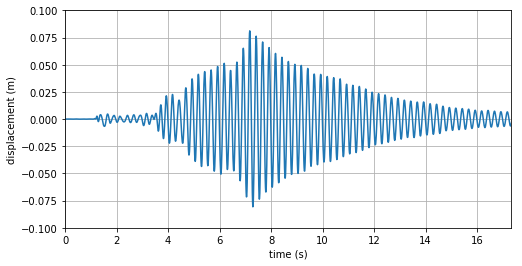

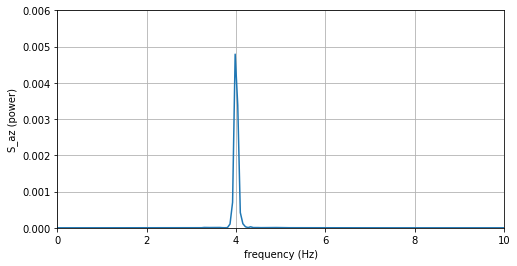

In [531]:
u_DH = az.sdof_Duhamel(4, zt, u0, v0)/m # fn = 1.0 

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(t, u_DH[0])

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.1, 0.1);   plt.ylabel('displacement (m)') 

plt.grid(True) 

Su_DH, fs = u_DH.periodogram()
fu_DH     = u_DH.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(fu_DH, Su_DH[0])

plt.xlim(0, 10);   plt.xlabel('frequency (Hz)') 
plt.ylim(0,  0.006);   plt.ylabel('S_az (power)') 

plt.grid(True) 

Conforme arbitrado e verificado no gráfico, a frequência de maior amplitude é a de 4Hz.

## 6. RESULTADOS E DISCUSSÃO <a name="section_6"></a>

Inicialmente vale destacar que a presição do acelerômetro utilizado é baixa, o que pode ter influenciado na leitura dos dados, porém para finalidade didática é satisfatório.

Com relação ao pseudo espectro da aceleração, conforme o período da estrutura aumenta, a aceleração de pico cresce (até as frequencias de 4 e 5 Hz). A partir dessas frequências a aceleração diminui. Comportamento esse esperado, pois as maiores energias estão em 4 e 5 Hz, ou seja, onde é obtido os maiores deslocamentos.

Com relação aos periodogramas, a aceleração apresenta frequências com maiores energias em 4Hz. Esse valor foi utilizado para calcular o periodograma dos deslocamentos, o qual conforme esperado, apresenta um pico em 4 Hz, exatamente a frequência natural arbitrada para a estrutura.

Como os dois maiores picos para o periodograma das acelerações foram em 4 e 5 Hz, esses representam os valores de maior deslocamento da estrutura.

## REFERÊNCIAS <a name="section_7"></a>

Notas de aula do professor [Marcelo Rocha](https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_05_NumericalIntegration.ipynb?flushcache=true). 